In [1]:
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

from Models.TheAutoencoders.VanillaAE import AutoEncoder

/home/fityan/.local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BATCH_SIZE = 64
DEVICE = 'cuda:0' if torch.cuda.is_available() else 'cpu'

transform = transforms.Compose([transforms.ToTensor()])
train_data = MNIST('./Datasets', train=True, download=True, transform=transform)
test_data = MNIST('./Datasets', train=False, download=True, transform=transform)

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [4]:
EPOCH = 25
LEARNING_RATE = 0.001
loss_function = nn.MSELoss()
autoencoder = AutoEncoder('CNN',28,28,8)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LEARNING_RATE)

autoencoder.train()
for epoch in range(EPOCH):
    overall_loss = 0
    for batch_index, (x, _) in enumerate(train_dataloader):
        x = x.to(DEVICE)
        optimizer.zero_grad()
        output = autoencoder(x)
        loss = loss_function(output, x)
        overall_loss += loss.item()
        loss.backward()
        optimizer.step()
    if epoch == 0 or (epoch+1)%5 == 0:
        print(epoch+1, overall_loss / (batch_index*BATCH_SIZE))

1 0.000798823374077298
2 0.00039520600414685826
3 0.000328012145675516
4 0.0002948012938307998
5 0.00027432847738125845
6 0.0002599836371956083
7 0.00024975943527884655
8 0.0002410803059929298
9 0.00023455253033240284
10 0.00022895061634910832
11 0.00022385942512624196
12 0.00021987755345506145
13 0.00021608741160679962
14 0.00021324080521049
15 0.00021035890024738823
16 0.0002081142376915511
17 0.00020607510765988614
18 0.00020408541737971657
19 0.0002023109905996977
20 0.00020055924391914695
21 0.00019898412256176597
22 0.00019739281587161545
23 0.0001959953196021244
24 0.0001948566417090034
25 0.00019332224335059277


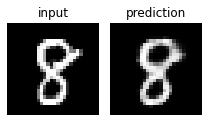

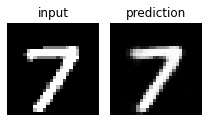

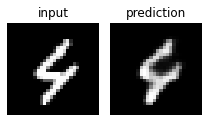

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from torch_snippets import show
for _ in range(3):
    ix = np.random.randint(len(test_data))
    im, _ = test_data[ix]
    _im = autoencoder(im[None])[0]
    fig, ax = plt.subplots(1, 2, figsize=(3,3))
    show(im[0], ax=ax[0], title='input')
    show(_im[0], ax=ax[1], title='prediction')
    plt.tight_layout()
    plt.show()

/home/fityan/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/fityan/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


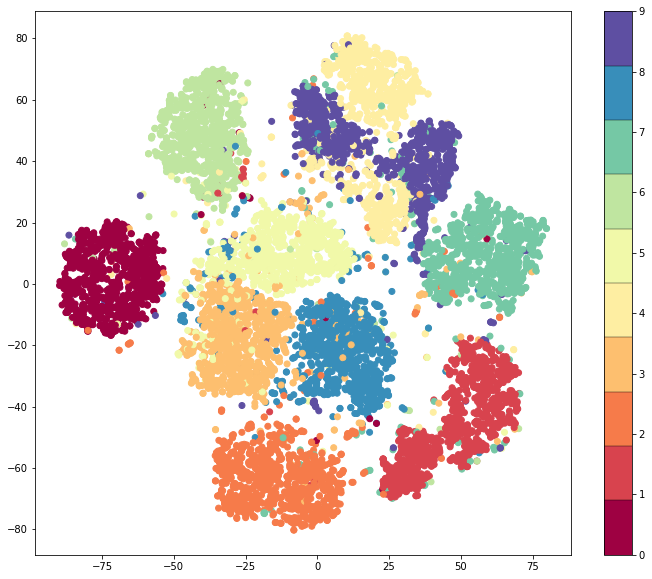

In [6]:
from sklearn.manifold import TSNE
latent_vectors = []
classes = []
for im,clss in test_dataloader:
    latent_vectors.append(autoencoder.encoder(im).view(len(im),-1))
    classes.extend(clss)
latent_vectors = torch.cat(latent_vectors).cpu().detach().numpy()
tsne = TSNE(2)
clustered = tsne.fit_transform(latent_vectors)
fig = plt.figure(figsize=(12,10))
cmap = plt.get_cmap('Spectral', 10)
plt.scatter(*zip(*clustered), c=classes, cmap=cmap)
plt.colorbar(drawedges=True)